In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import chardet
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

**Task 1: Clean and Explore The Weather Dataset**

In [ ]:
# Uploading the historical weather dataset
file=r"Paris_weather_data_2017.csv"

# Character encoding detector

with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

#Reading the imported weather file as  a CSV
weather1= pd.read_csv(file,encoding='ISO-8859-9')

#Creating a dataframe for the dataset
weather= pd.DataFrame(weather1)

#Cleaning data by removing dashes and dropping irrelevant columns
weather=weather.replace('-', np.nan)
weather=weather.drop(weather.columns[-1], axis=1)
weather=weather.drop(weather.columns[-2], axis=1)

#Filling gaps using linear interpolation
weather.interpolate(inplace=True)

#Convert date to datetime and seting the format
weather['Date']= pd.to_datetime(weather['Date'], format='%m/%d/%Y')

weather


,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,2017-12-30,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [ ]:
#Setting the date as an index

weather_df=weather.set_index(weather.columns[0])

weather_df


,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
Date,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12


In [ ]:
#checking for NaN values in dataframe
print(weather_df.isna().sum())

#checking the data types
print(weather_df.dtypes)



high Temp. (°C)                0
avg Temp. (°C)                 0
low Temp. (°C)                 0
high Dew Point (°C)            0
avg Dew Point (°C)             0
low Dew Point (°C)             0
high Humidity (%)              0
avg Humidity (%)               0
low Humidity (%)               0
high Sea Level Press. (hPa)    0
avg Sea Level Press. (hPa)     0
low Sea Level Press. (hPa)     0
high Visibility (km)           0
avg Visibility (km)            0
low Visibility (km)            0
high Wind (km/h)               0
avg Wind (km/h)                0
sum Precip. (mm)               0
dtype: int64
high Temp. (°C)                  int64
avg Temp. (°C)                   int64
low Temp. (°C)                   int64
high Dew Point (°C)              int64
avg Dew Point (°C)               int64
low Dew Point (°C)               int64
high Humidity (%)                int64
avg Humidity (%)                 int64
low Humidity (%)                 int64
high Sea Level Press. (hPa)      int64
avg

**Calculate the correlation matrix between all the weather variables. Make a graphic to show the correlation matrix as a heat-map.**

In [ ]:
#Calculate correlation matrix between all the weather variables and assign it to variable matrix
matrix= weather_df.corr()
matrix

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
high Temp. (°C),1.000000,0.976658,0.888110,0.856099,0.858129,0.843248,-0.394430,-0.642644,-0.653028,-0.253617,-0.150903,-0.088462,0.472632,0.583418,0.433610,-0.081673,-0.199951,-0.059089
avg Temp. (°C),0.976658,1.000000,0.962072,0.913373,0.921361,0.909771,-0.378330,-0.562269,-0.553089,-0.308957,-0.203274,-0.135283,0.470747,0.516090,0.382910,-0.020533,-0.118921,-0.009994
low Temp. (°C),0.888110,0.962072,1.000000,0.929764,0.944682,0.938312,-0.333137,-0.424648,-0.389762,-0.365482,-0.261217,-0.190036,0.440356,0.396212,0.294317,0.054929,-0.007974,0.052513
high Dew Point (°C),0.856099,0.913373,0.929764,1.000000,0.978604,0.940691,-0.087426,-0.233558,-0.262292,-0.355841,-0.264679,-0.192708,0.423909,0.284302,0.137303,0.019975,-0.096624,0.132642
avg Dew Point (°C),0.858129,0.921361,0.944682,0.978604,1.000000,0.979591,-0.094926,-0.214550,-0.231225,-0.329256,-0.229100,-0.158419,0.391113,0.275633,0.141021,-0.028561,-0.120984,0.108504
low Dew Point (°C),0.843248,0.909771,0.938312,0.940691,0.979591,1.000000,-0.111733,-0.218440,-0.221393,-0.303539,-0.199631,-0.133562,0.370891,0.283601,0.157779,-0.067316,-0.138766,0.073233
high Humidity (%),-0.394430,-0.378330,-0.333137,-0.087426,-0.094926,-0.111733,1.000000,0.784955,0.564862,0.060913,0.018209,0.005438,-0.197160,-0.537656,-0.650603,-0.104845,-0.162285,0.216222
avg Humidity (%),-0.642644,-0.562269,-0.424648,-0.233558,-0.214550,-0.218440,0.784955,1.000000,0.913106,0.088453,0.034150,0.014301,-0.393915,-0.751189,-0.705064,-0.035586,0.009024,0.263498
low Humidity (%),-0.653028,-0.553089,-0.389762,-0.262292,-0.231225,-0.221393,0.564862,0.913106,1.000000,0.125158,0.069619,0.041238,-0.470039,-0.713792,-0.608081,-0.002123,0.081944,0.203391
high Sea Level Press. (hPa),-0.253617,-0.308957,-0.365482,-0.355841,-0.329256,-0.303539,0.060913,0.088453,0.125158,1.000000,0.964592,0.899322,-0.420369,-0.160598,-0.091900,-0.485558,-0.371158,-0.359849


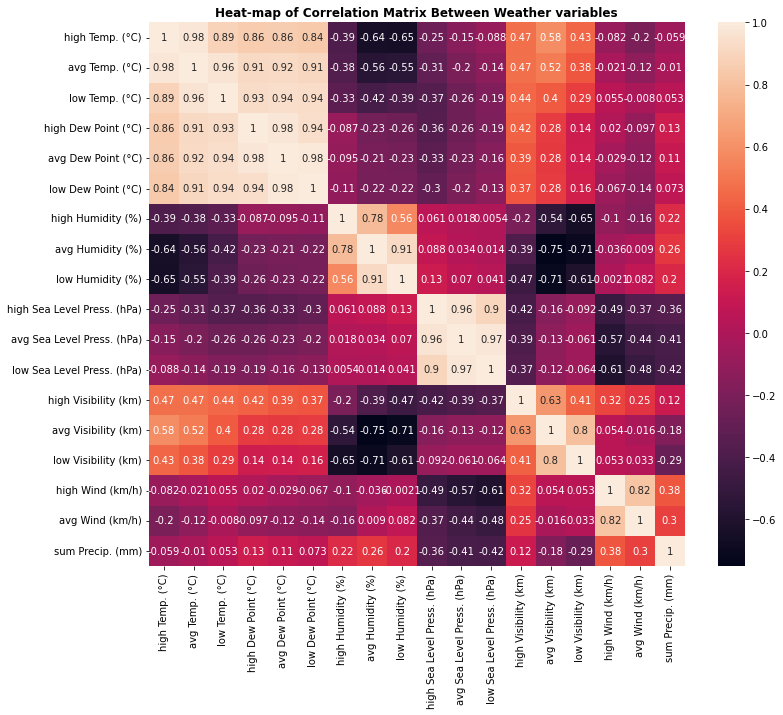

In [ ]:
#Make a graphic to show the correlation matrix between all weather variables as a Heat-map
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(matrix,annot=True)
plt.title('Heat-map of Correlation Matrix Between Weather variables',fontweight='bold')
plt.show()


**Task 3: Load, Clean and Explore The Daily Electricity Consumption Data**

In [ ]:
#Upload and read historical daily electricity consumption data for France as CSV
read_file=pd.read_csv(r"Historique_consommation_JOUR_2017.csv",skiprows=17)

#Convert data to data frame
df=pd.DataFrame(read_file)

#Cleaning the data
df.columns=['empty1','empty2','empty3','Date','Type de données','Energie journalière (MWh)']

df=df.drop(['empty1','empty2','empty3'], axis=1)

df=df.drop(['Type de données'], axis=1)

df= df.dropna()


#setting date column as index and converting the date format
df=df.set_index('Date')
df.index = pd.to_datetime(df.index,format='%d/%m/%Y')
df['Energie journalière (MWh)']=df['Energie journalière (MWh)']

df





,Energie journalière (MWh)
Date,
2017-01-01,1652084.0
2017-01-02,1768332.0
2017-01-03,1886120.0
2017-01-04,1923775.0
2017-01-05,1887470.0
...,...
2017-12-27,1582970.0
2017-12-28,1664743.0
2017-12-29,1668623.0


**Task 4: Synchronise the dates corresponding to both time series and make a scatter plot of energy consumption against mean temperature**

In [ ]:
#Synchronizing the dates corresponding to both time series
df2=pd.merge(weather_df,df,on='Date', how = 'inner')
df2

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Energie journalière (MWh)
Date,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,1652084.0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,1768332.0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,1886120.0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,1923775.0
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,1887470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4,1582970.0
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0,1664743.0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12,1668623.0


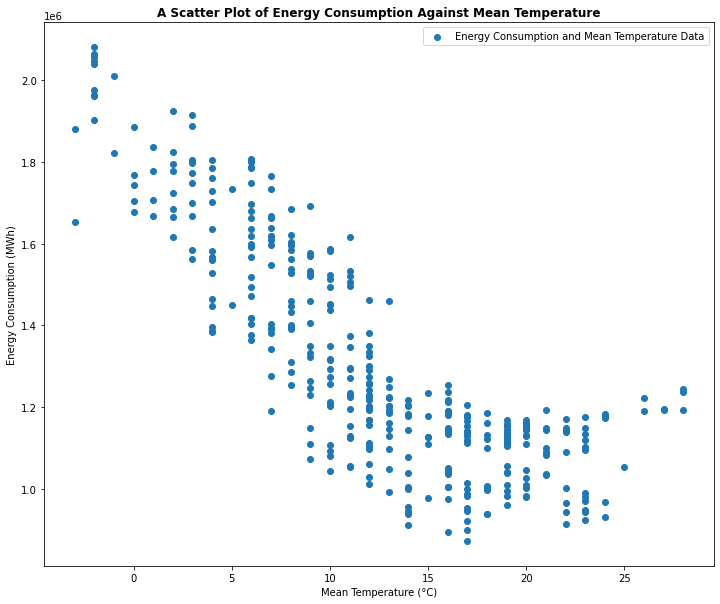

In [ ]:
#Make a scatterplot of energy consumption against mean temperature

consumption=df2.iloc[:,-1]
mean_temp=df2.iloc[:,1]


plt.figure(figsize=(12,10))
plt.scatter(mean_temp,consumption, label='Energy Consumption and Mean Temperature Data')
plt.title('A Scatter Plot of Energy Consumption Against Mean Temperature',fontweight='bold')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (MWh)')
plt.legend()
plt.show()

**Task 5: Fit a quadratic model to the energy versus temperature. Plot the quadratic fit as a line on top of the scatter plot**

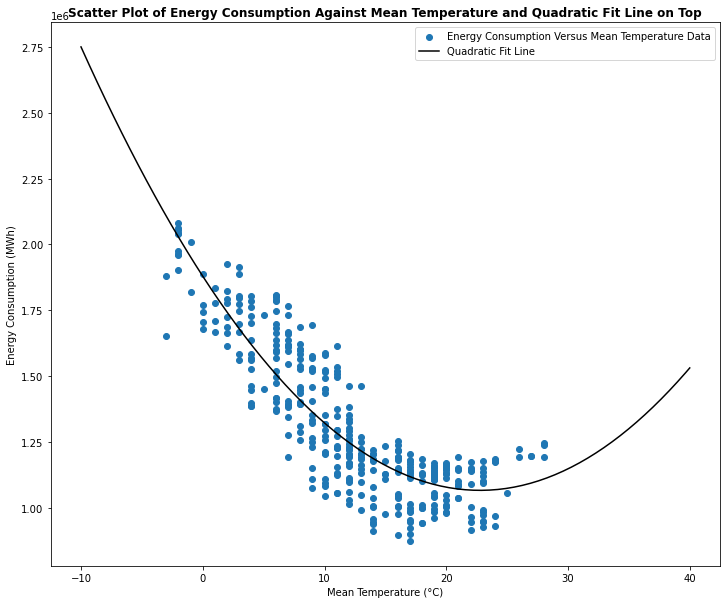

In [ ]:
#Fiting a quadratic model to the energy versus temperature
model=np.poly1d(np.polyfit(mean_temp,consumption,2))
quadratic_line=np.linspace(-10,40,150)

#ploting the quadratic fit line as a line on top of the scatter plot
plt.figure(figsize=(12,10))
plt.scatter(mean_temp,consumption, label='Energy Consumption Versus Mean Temperature Data')
plt.plot(quadratic_line,model(quadratic_line), label='Quadratic Fit Line', c='black')
plt.title('Scatter Plot of Energy Consumption Against Mean Temperature and Quadratic Fit Line on Top',fontweight='bold')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (MWh)')
plt.legend()
plt.show()

**Task 6: Based on the empirical analysis, what is the optimal temperature coinciding with minimal consumption? Use the quadratic fit and verify visually**

In [ ]:
#Print out nature of the quadratic model

print(model)

      2
1567 x - 7.141e+04 x + 1.879e+06


In [ ]:
#find the minimal consumption value
min_value=model(quadratic_line).min()
min_value

1065884.2996292403

In [ ]:
#find the optimal temperature that coincided with the minimal consumption value
optimal_tempertr= quadratic_line[list(model(quadratic_line)).index(min_value)]
optimal_tempertr

22.88590604026846

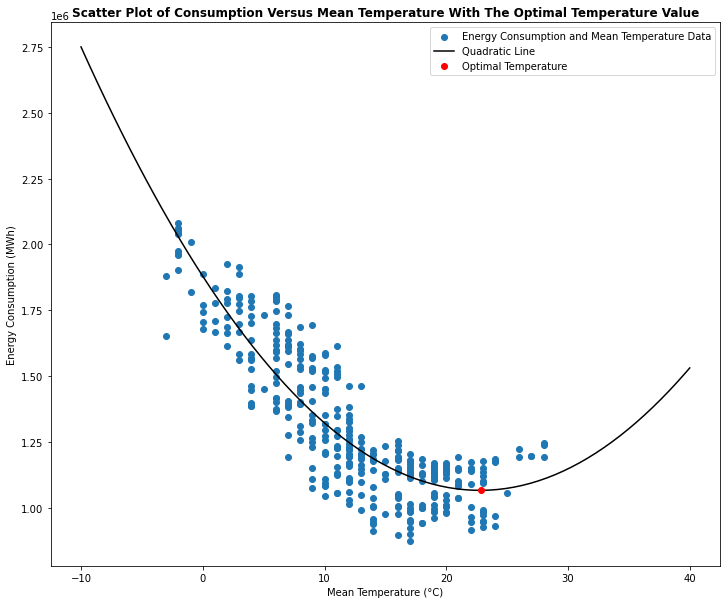

In [ ]:
#Fiting a quadratic model to the energy versus temperature
model=np.poly1d(np.polyfit(mean_temp,consumption,2))
polyline=np.linspace(-10,40,150)

#ploting the quadratic fit line as a line on top of the scatter plot
plt.figure(figsize=(12,10))
plt.scatter(mean_temp,consumption, label='Energy Consumption and Mean Temperature Data')
plt.plot(polyline,model(polyline), label='Quadratic Line',c='black')
# plt.axvline(optimal_tempertr, c='r',label='Optimum Temperature')
plt.plot(optimal_tempertr,min_value,'or', label='Optimal Temperature')
plt.title('Scatter Plot of Consumption Versus Mean Temperature With The Optimal Temperature Value', fontweight='bold')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (MWh)')
plt.legend(loc='upper right')
plt.show()

**Task 7: Use a stepwise approach to find an optimal multivariate linear regression model using the weather variables to forecast consumption. Which variables are selected? What is the coefficient of determination, R2?**


In [ ]:
#Defining X_val and y_val values from the initial weather variables and energy consumption
X_val= df2.iloc[:,0:18]
y_val= df2.iloc[:,-1]

#Stepwise approach to selecting significant variables for building multivariate linear regression model
def forward_regression(X, y,
                       threshold_in,
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included
selected_col=forward_regression(X_val,y_val,0.05)
print(selected_col)


Add  high Temp. (°C)                with p-value 1.82151e-93
Add  high Visibility (km)           with p-value 9.72513e-08
Add  high Humidity (%)              with p-value 0.000846698
Add  avg Temp. (°C)                 with p-value 0.014433
Add  low Humidity (%)               with p-value 7.79481e-06
Add  avg Dew Point (°C)             with p-value 0.00204418
Add  low Sea Level Press. (hPa)     with p-value 0.00718581
['high Temp.\xa0(°C)', 'high Visibility\xa0(km)', 'high Humidity\xa0(%)', 'avg Temp.\xa0(°C)', 'low Humidity\xa0(%)', 'avg Dew Point\xa0(°C)', 'low Sea Level Press.\xa0(hPa)']


In [ ]:

# Calculating the coefficient of determination
X=df2[selected_col]
y= df2.iloc[:,-1]


#instantiating LinearRegression model
regressor= LinearRegression()

#fitting the model to the training data
regressor.fit(X,y)
y_pred= regressor.predict(X)


#Coeffecient of determination

r2=r2_score(y,y_pred)
r2


0.7506437341112865

**Task 8: Increase the number of explanatory variables by also considering squared terms for each weather variable. Use a stepwise approach to obtain a new model. Which variables are selected? What is the new R2 value and is this an improvement?**


In [ ]:

#Dataframe of X explanatory varaibles

column_values=selected_col
X_values_df=X_val


#Creating a dictionary of new names for the X squared data frame columns

column_names={}
for col in X_values_df.columns:
    n_col=col+'2'
    column_names[col]=n_col


#Squaring the X dataframe values to obtain X-Squared dataframe variable terms

squared_x=X_values_df**2

#Renaming squared_x column names
df1 = squared_x.rename(columns=column_names)


In [ ]:
#Merge dataframe of X variables and X-squared by concatenating
x_square_x=pd.concat([X_values_df,df1],axis=1)
x_square_x

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Humidity (%)2,high Sea Level Press. (hPa)2,avg Sea Level Press. (hPa)2,low Sea Level Press. (hPa)2,high Visibility (km)2,avg Visibility (km)2,low Visibility (km)2,high Wind (km/h)2,avg Wind (km/h)2,sum Precip. (mm)2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144


In [ ]:
#Stepwise approach to determine the selected new variable from the X and X-squared dataframe

#New X and y values from the X and X-squared dataframe
X_val_2=x_square_x
y_val_2=df2.iloc[:,-1]

#selected variables for X,X2 variables combined
selected_col_2=forward_regression(X_val_2,y_val_2,0.05)
print(selected_col_2)




Add  high Temp. (°C)                with p-value 1.82151e-93
Add  high Temp. (°C)2               with p-value 1.18332e-36
Add  high Visibility (km)2          with p-value 0.0300572
Add  high Visibility (km)           with p-value 0.00131632
['high Temp.\xa0(°C)', 'high Temp.\xa0(°C)2', 'high Visibility\xa0(km)2', 'high Visibility\xa0(km)']


In [ ]:
#Coeffecient of determination for merged X variables and X2 varibles; x_square_x dataframe

#Define x_2 and y_2 for the new merged dataframe containing X variables and X2 variables
X_2=x_square_x[selected_col_2]
y_2= df2.iloc[:,-1]


#Instantiating the LinearRegression model
regressor= LinearRegression()

#fitting the model to the
regressor.fit(X_2,y_2)
y_pred= regressor.predict(X_2)

#Coeffecient of determination
r2_2=r2_score(y_2,y_pred)
r2_2

0.8068265031072407

**Task 9: Consider the day of the week effect by including dummy variables for the day of the week in the multivariate regression. Which days of the week are selected for the new model? What is the new R2 value and does this improve the model?**


In [ ]:
#Creating dummy variables for day of the week
weather1=weather.set_index(weather['Date'], drop=False)
dd=weather1['Date'].dt.day_name()#dayofweek
dummy_df=pd.get_dummies(dd)
dummy_df

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,
2017-01-01,0,0,0,1,0,0,0
2017-01-02,0,1,0,0,0,0,0
2017-01-03,0,0,0,0,0,1,0
2017-01-04,0,0,0,0,0,0,1
2017-01-05,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2017-12-27,0,0,0,0,0,0,1
2017-12-28,0,0,0,0,1,0,0
2017-12-29,1,0,0,0,0,0,0


In [ ]:
#concatenating X,X2, and dummy variables
x_2_dummy = x_square_x.join(dummy_df)
x_2_dummy


,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,high Wind (km/h)2,avg Wind (km/h)2,sum Precip. (mm)2,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,100,36,0,0,0,0,1,0,0,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,256,36,4,0,1,0,0,0,0,0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,196,36,0,0,0,0,0,0,1,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,529,196,4,0,0,0,0,0,0,1
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,196,121,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,...,1521,576,16,0,0,0,0,0,0,1
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,...,361,169,0,0,0,0,0,1,0,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,...,1024,169,144,1,0,0,0,0,0,0


In [ ]:
#Stepwise approach to determine the selected new variable from the X and X-squared and dummy variables dataframe

X_val_3=x_2_dummy
y_val_3=df2.iloc[:,-1]


#selected variables for X,X2 and dummy variables
selected_col_3=forward_regression(X_val_3,y_val_3,0.05)
print(selected_col_3)

Add  high Temp. (°C)                with p-value 1.82151e-93
Add  high Temp. (°C)2               with p-value 1.18332e-36
Add  Sunday                         with p-value 2.02543e-18
Add  Saturday                       with p-value 1.51634e-18
Add  avg Temp. (°C)                 with p-value 2.22261e-05
Add  low Humidity (%)               with p-value 2.29513e-06
Add  high Wind (km/h)2              with p-value 0.000399405
Add  Monday                         with p-value 0.00398247
Add  sum Precip. (mm)               with p-value 0.0117157
Add  avg Temp. (°C)2                with p-value 0.026503
Add  high Dew Point (°C)2           with p-value 0.016792
['high Temp.\xa0(°C)', 'high Temp.\xa0(°C)2', 'Sunday', 'Saturday', 'avg Temp.\xa0(°C)', 'low Humidity\xa0(%)', 'high Wind\xa0(km/h)2', 'Monday', 'sum Precip.\xa0(mm)', 'avg Temp.\xa0(°C)2', 'high Dew Point\xa0(°C)2']


In [ ]:
#Coeffecient of determination for merged X variables, X2 varibles and dummy variables; x_square_x and dummy dataframes

X_3=x_2_dummy[selected_col_3]
y_3= df2.iloc[:,-1]


#Instantiating the LinearRegression model
regressor= LinearRegression()

#fitting the model to the
regressor.fit(X_3,y_3)
y_pred= regressor.predict(X_3)

#Coeffecient of determination
r2_3=r2_score(y_3,y_pred)
r2_3

0.8945057843312311